## Plot coherence with respect to a central point

In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from coh_tools import *
from scipy.signal import csd
from sklearn.decomposition import PCA
%matplotlib inline

/Users/julienbloch/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
os.chdir("/media/julien/hdd2tb/lab/elife/data")

FileNotFoundError: [Errno 2] No such file or directory: '/media/julien/hdd2tb/lab/elife/data'

In [ ]:
experiments = pd.read_csv('table_of_experiments.csv')

In [ ]:
single_stim_experiments = experiments.loc[experiments["Number of Lasers during Conditioning"] == 1]

In [ ]:
single_stim_experiments

In [ ]:
single_stim_experiments_list = single_stim_experiments["File Name"].tolist()
single_stim_experiments_list = [name[:-4] for name in single_stim_experiments_list]
laser_from_locations = single_stim_experiments["stim_Coh_from"].tolist()
# laser_to_locations = single_stim_experiments["stim_Coh_to"].tolist()[:2]
num_lasers = single_stim_experiments["Number of Lasers during Conditioning"].tolist()

In [ ]:
# single_stim_experiments_list = single_stim_experiments_list[:2]

In [ ]:
single_stim_experiments_list

In [ ]:
## need to extract phase of coherence by hand using cross-spectral density

In [ ]:
# coh_index = 48
for freq_band in ["high_gamma", "theta"]:

    i = 0
    for experiment in single_stim_experiments_list[2:]:
        file_location = experiment + "/RecordingBlocks/"
        first = True
        laser_from = None
#         laser_to = None
        file_list = os.listdir(file_location)
        file_list.sort()
        stim_index = 1
        for filename in file_list:
            if not filename.endswith(".mat"):
                continue
            baseline_filename = file_location + filename
                        
            savenamebase = "images/"+freq_band+"/nonclustered/phaseplots/" + experiment + filename[:-4]
            laser_from = int(laser_from_locations[i])
#             laser_to = coh_index
            coh_index = laser_from
            data, sample_freq = extract_lfp(baseline_filename, True)
            low, high = get_band_range(freq_band)
            baseline_coh = band_coherence(data, sample_freq, low, high)            
            
            ####### TESTING PCA DIMS
            # downproject coherences data to lower PC space for denoising
            down_proj = PCA(n_components=96)
            down_data = down_proj.fit_transform(baseline_coh)
            yeah = down_proj.singular_values_
            nah = down_proj.explained_variance_ratio_
            break

            map_to_ecog(lasersite_coh_labels, savenamebase+"_base", laser_from=laser_from, 
                        center=True, cmap="bwr")

            if not first:
                # get new baseline - old baseline and plot it
                delta_baseline = lasersite_coh_labels - old_baseline
                map_to_ecog(delta_baseline, savenamebase+"_deltabase", laser_from=laser_from, 
                            center=True, cmap="bwr")
                
                # get stim - old baseline and plot it
                stim_filename = baseline_filename.replace("Recording", "Conditioning").\
                    replace("RecBlock"+str(stim_index+1), "CondBlock"+str(stim_index))
                stim_data = extract_lfp(stim_filename)
                stim_coh = band_coherency(stim_data, sample_freq, low, high)[coh_index, :]
                delta_stim_coh = stim_coh - old_baseline
                map_to_ecog(delta_stim_coh, savenamebase+"_deltastim", laser_from=laser_from, 
                            center=True, cmap="bwr", spread=np.pi)
                stim_index += 1

                
            first = False
            old_baseline = lasersite_coh_labels
        print("finished with " + experiment)
        i += 1
        break
    break

In [ ]:
yeah

In [3]:
plt.plot(yeah)

NameError: name 'yeah' is not defined

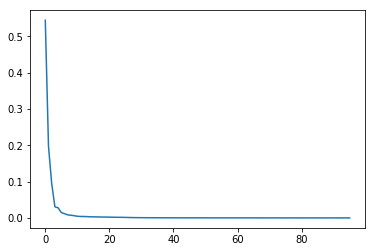

In [70]:
plt.plot(nah)

In [71]:
nah

array([5.44319950e-01, 1.97167534e-01, 9.46709109e-02, 3.05754936e-02,
       2.78065226e-02, 1.47644286e-02, 1.16951031e-02, 8.32882522e-03,
       7.39980079e-03, 6.12896279e-03, 4.57058546e-03, 3.96912420e-03,
       3.85113430e-03, 3.62241030e-03, 3.02860819e-03, 3.01731005e-03,
       2.76649248e-03, 2.54909757e-03, 2.41420604e-03, 2.30546534e-03,
       2.13558700e-03, 1.93219827e-03, 1.77975120e-03, 1.63879077e-03,
       1.62986603e-03, 1.39891779e-03, 1.19086619e-03, 9.52471104e-04,
       8.13213541e-04, 7.37320250e-04, 6.44375576e-04, 5.92655350e-04,
       5.28050996e-04, 4.93053801e-04, 4.70362827e-04, 4.18906134e-04,
       3.77940402e-04, 3.42260602e-04, 3.24577193e-04, 3.09981365e-04,
       2.92507972e-04, 2.76957195e-04, 2.48219598e-04, 2.42398519e-04,
       2.38270408e-04, 2.30716477e-04, 2.16651301e-04, 2.14397627e-04,
       2.00358586e-04, 1.83433151e-04, 1.74639584e-04, 1.72638506e-04,
       1.65179058e-04, 1.57393114e-04, 1.55084698e-04, 1.48745110e-04,
      

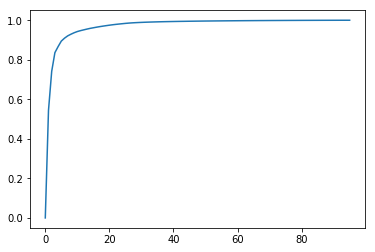

In [72]:
plt.plot([np.sum(nah[:i]) for i in range(len(nah))])

In [73]:
[(i, np.sum(nah[:i])) for i in range(len(nah))]

[(0, 0.0),
 (1, 0.544319949892614),
 (2, 0.7414874839602323),
 (3, 0.8361583948242932),
 (4, 0.8667338884553705),
 (5, 0.89454041100943),
 (6, 0.9093048396582161),
 (7, 0.9209999427832435),
 (8, 0.929328768006324),
 (9, 0.9367285687983998),
 (10, 0.9428575315855956),
 (11, 0.9474281170464449),
 (12, 0.9513972412436466),
 (13, 0.9552483755413731),
 (14, 0.9588707858366977),
 (15, 0.9618993940280629),
 (16, 0.9649167040761617),
 (17, 0.9676831965602297),
 (18, 0.9702322941323348),
 (19, 0.9726465001719732),
 (20, 0.9749519655119309),
 (21, 0.9770875525103717),
 (22, 0.979019750778299),
 (23, 0.9807995019787435),
 (24, 0.9824382927443234),
 (25, 0.9840681587706858),
 (26, 0.9854670765617088),
 (27, 0.9866579427564621),
 (28, 0.9876104138608155),
 (29, 0.9884236274021488),
 (30, 0.9891609476517826),
 (31, 0.9898053232279939),
 (32, 0.9903979785784339),
 (33, 0.9909260295745301),
 (34, 0.9914190833756558),
 (35, 0.9918894462026986),
 (36, 0.9923083523369172),
 (37, 0.9926862927392485),
 (38